# Exercise 11

In [56]:
import numpy as np
import matplotlib.pyplot as plt

## 1. Radioactive decay chain

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-life $\tau$ of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

In [10]:
tau = 3.052 * 60
Tl_init = 1000 #number of TI-atoms at start
Pb_init = 0

def p(t):
    return 1 - 2**(-t/tau)

def radioMonte(t, Tl, Pb):
    n_Tl = np.empty(t)
    n_Pb = np.empty(t)
    
    n_Tl[0] = Tl
    n_Pb[0] = Pb
        
    decay_limit = np.random.random(Tl_init)
    
    for i in range(1,t):
        decayed = len(decay_limit[p(i) > decay_limit])
        n_Tl[i] = Tl - decayed
        n_Pb[i] = Pb + decayed
        
    return n_Tl, n_Pb
    

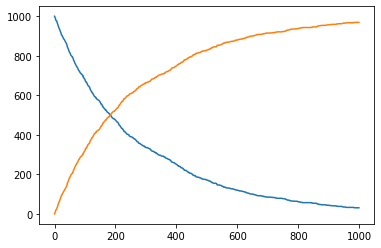

In [11]:
t = 1000
n_Tl, n_Pb = radioMonte(t, Tl_init, Pb_init)
plt.plot(n_Tl)
plt.plot(n_Pb)
plt.show()

### Inverse transformation method:

First we need to find the inverse probability function. We know that:

$p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$

Which means that:

$P(t) = \int_0^t p(t')dt' = \frac{\ln2}{\tau} \int_0^t 2^{-t'/\tau} dt' = 1 - 2^{-t/\tau} = y$

Inverting and solving for t gives:

$t(y) = P^{-1}(y) = -\frac{\tau \cdot ln(1-y)}{ln(2)}$

Using this function we get:

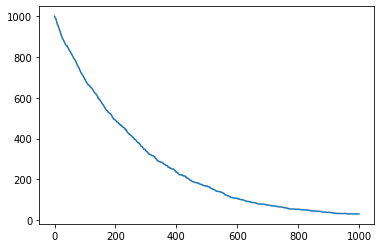

In [71]:
def p2(t):
    #return 2**((-t/tau)*(np.log(2)/2))
    return - tau*np.log(1-y)/np.log(2)
 
def radioMonteReverse(t, Tl):
    y = np.random.random(Tl)
    time_decay = p2(y)
    
    n_Tl = np.ones(t)*Tl
    
    for i in range(1,t):
        decayed = len(time_decay[i>time_decay])
        n_Tl[i] = Tl - decayed
    
    
    return n_Tl

n_Tl2 = radioMonteReverse(1000, Tl_init)
plt.plot(n_Tl2)

## 2. Monte Carlo integration: hit/miss vs mean value method

Consider the function: 

$$f(x) =\sin^2{\left( \frac{1}{1-x} \right)}$$

* Plot the function and compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate (hint: repeat the integral $N$ times, and from the distribution of the integrals take the mean value and the standard deviation, the latter rescaled by the appropriate factor)
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one.

In [72]:
def f2(x):
    return (np.sin(1/(1-x)))**2

#x = np.linspace(0,2,100)
#plt.plot(x, f2(x))
#plt.show()

In [49]:
def hitMiss(N):
    I_list = np.zeros(N)
    
    for i in range(N):
        n = 100000
        count = 0

        x = 2 * np.random.random()# x is random uniform between 0 and 2
        y = np.random.random() # y is random uniform between 0 and 1
        
        if y < f2(x): count += 1

        I_list[i] = 2 * count / n
    #print('Integral:', I_list)
    print('Mean value: ', np.mean(I_list))
    print('Standard deviation: ', np.std(I_list))
hitMiss(500)

Mean value:  1.3400000000000002e-05
Standard deviation:  9.404254356406998e-06


In [50]:
def meanValue(N):
    x = 2 * np.random.random(N)
    I = (2 / N) * np.sum(f2(x))
    
    std = 2 * np.sqrt(np.var(f2(x)/N))
    print('Integral:', I)
    print('Standard deviation: ', std)
    
meanValue(500)

Integral: 1.3264129942793377
Standard deviation:  0.0013418076560368305


The error is clearly smaller in the hit/miss method, so this would be preferable to use in this case.

## 3. Monte Carlo integration in high dimension

* Compute the area of a circle of unit radius, by integrating the function:

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere.

In [73]:
def f_circle(x, y):
    s = x**2 + y**2 <=1
    return np.sum(s)

N = 1000000
x = 2 * np.random.random(N) - 1
y = 2 * np.random.random(N) - 1

V = 2**2
I = V/N * f_circle(x, y)
print('The area of the circle of unit radius, a 2D circle, is: ', I)

The area of the circle of unit radius, a 2D circle, is:  3.1422079999999997


In [74]:
def f_10D(x):
    s = np.sum(x**2, axis = 0) <=1
    return np.sum(s)

N = 1000000
coords = 2 * np.random.random((10,N)) - 1


V_10D = 2**10
I_10D = V_10D/N * f_10D(coords)
print('The are of a 10D sphere is: ', I_10D)

The are of a 10D sphere is:  2.536448


## 4. Monte Carlo integration with importance sampling

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should expect a result around 0.84.

In [75]:
def w(x):
    return 1/np.sqrt(x)

def f3(x):
    return x**(-1/2) / (np.exp(x) + 1)


def importanceSampling(x, N):
    dx = x[1] - x[0]
    I = (1/N) * np.sum(f3(x) / w(x)) * np.sum(w(x))*dx
    print('The value of the integral is: ', I)
    

In [76]:
x = np.linspace(0.001,1,100)

importanceSampling(x, 100)

The value of the integral is:  0.8222570763381689


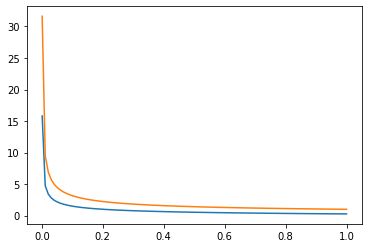

In [63]:
one = f3(x)
two = w(x)
plt.plot(x, one)
plt.plot(x, two)